## Part 2: Basic Inferential Data Analysis Instructions

## Data Dictionary (The Effect of Vitamin C on Tooth Growth in Guinea Pigs)

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| len|	 	Tooth length|
| supp|	 	Supplement type (VC or OJ)|
| dose|	 	Dose in milligrams.|


Dependant Variable (DV) is tooth length, Independant variables (IV) are supplement type and dose.

## Assumptions made

1. Sampled guinea pigs are repesentative for the population of guinea pigs
2. Dosage and supplement were randomly assigned
3. The population must be close to a normal distribution

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("ToothGrowth.csv")

In [3]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   len     60 non-null     float64
 1   supp    60 non-null     object 
 2   dose    60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [5]:
df.describe(include='all')

,len,supp,dose
count,60.000000,60,60.000000
unique,NaN,2,NaN
top,NaN,VC,NaN
freq,NaN,30,NaN
mean,18.813333,NaN,1.166667
std,7.649315,NaN,0.628872
min,4.200000,NaN,0.500000
25%,13.075000,NaN,0.500000
50%,19.250000,NaN,1.000000
75%,25.275000,NaN,2.000000


In [6]:
df.columns

Index(['len', 'supp', 'dose'], dtype='object')

## Data Visualization

### Univariate Data Exploration

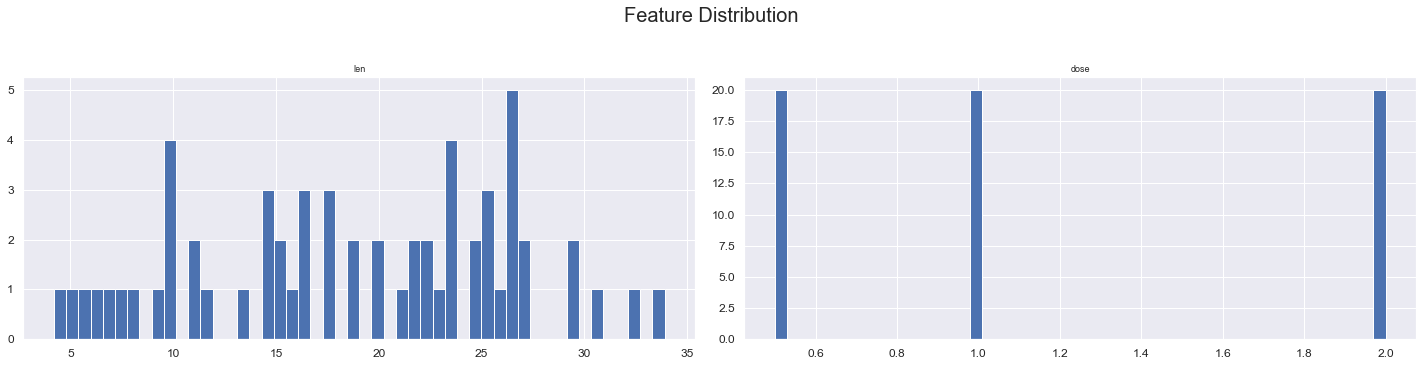

In [7]:
df.hist(bins=50, figsize=(20,5))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

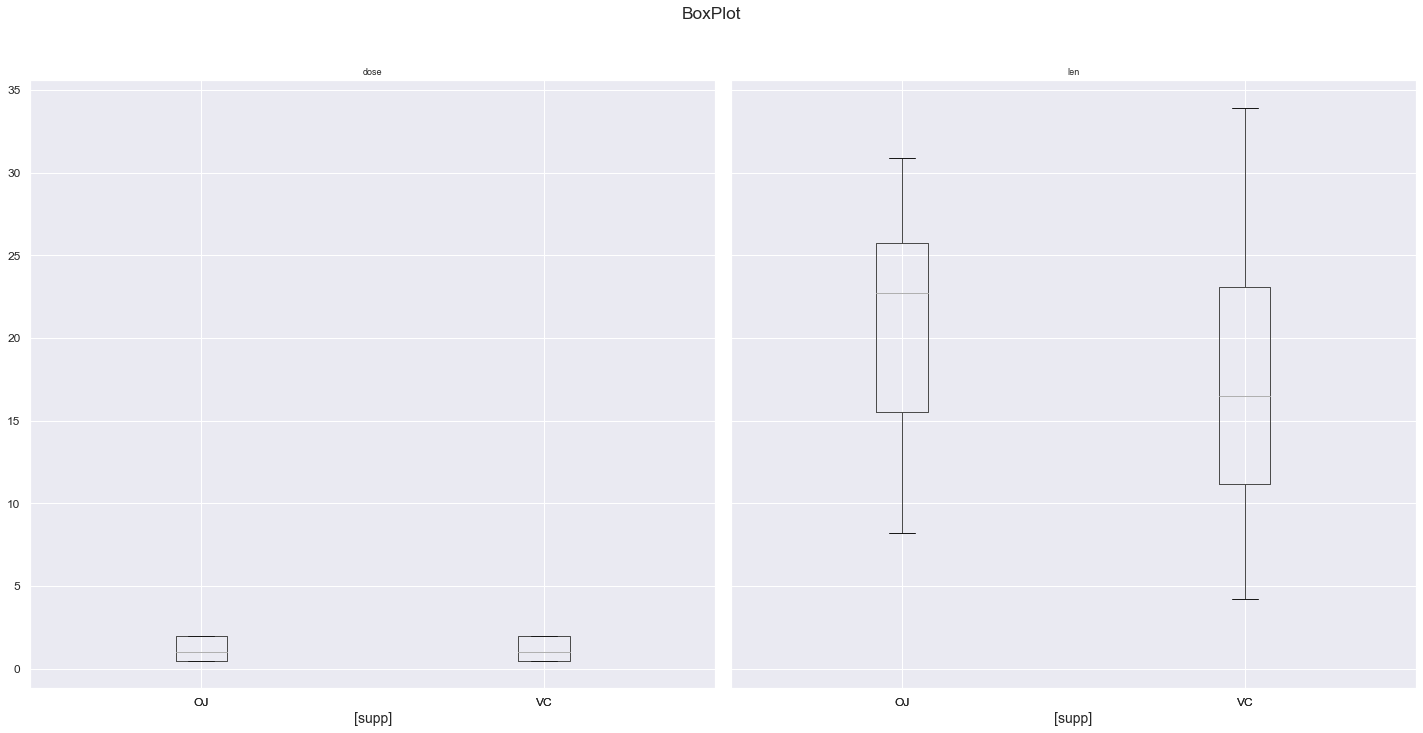

In [32]:
df.boxplot(figsize=(20,10), by='supp')
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

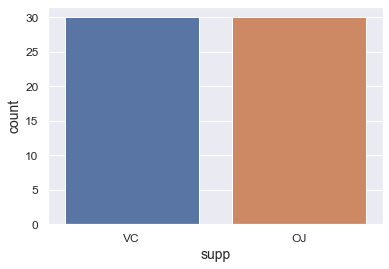

In [9]:
sns.countplot(df.supp)
plt.show()

## Hypothesis Testing

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

In [10]:
df.groupby(by="supp").mean()

,len,dose
supp,,
OJ,20.663333,1.166667
VC,16.963333,1.166667


In [11]:
df.groupby(by="supp").var()

,len,dose
supp,,
OJ,43.633437,0.402299
VC,68.327230,0.402299


### T-Test

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("there is no difference in dose between OJ and VC")
-   $H_1: µ\_1 ≠ µ\_2$ ("there is a difference in dose between OJ and VC")


## T-Test

### One Sample T-Test

In [13]:
t, p = scipy.stats.ttest_1samp(a=df.dose, popmean=1.166667)

In [14]:
print("T-test value is: ",t)
print("p-value value is: ",p)

T-test value is:  -4.1057451016103215e-06
p-value value is:  0.9999967379403212


### Two Samples T-Test

In [15]:
t, p = scipy.stats.ttest_ind(a=df.len,b=df.dose, equal_var = False)

In [16]:
print("T-test value is: ",t)
print("p-value value is: ",p)

T-test value is:  17.80955225252292
p-value value is:  1.3802361569449393e-25


### ANOVA

First, we group the data into categories as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

-   40 years and younger
-   between 40 and 57 years
-   57 years and older


State the hypothesis

-   $H_0: µ_1 = µ_2 $ (the two population means are equal)

-   $H_1:$ At least one of the means differ


### One Way ANOVA

In [17]:
mod = ols('len~supp', data=df).fit()

In [18]:
aov_table = sm.stats.anova_lm(mod,typ=2)

In [19]:
aov_table

,sum_sq,df,F,PR(>F)
supp,205.350000,1.0,3.668253,0.060393
Residual,3246.859333,58.0,NaN,NaN


p-value is more than 0.05, hence failed to reject Null Hypothesis

In [20]:
df["dose"].value_counts()

2.0    20
1.0    20
0.5    20
Name: dose, dtype: int64

In [21]:
f_statistic, p_value = scipy.stats.f_oneway(df.dose, df.len)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 317.18015143534444, P-Value: 3.104466162339778e-35


### Two-way ANOVA

In [22]:
mod1 = ols('len~supp+dose', data=df).fit()

In [23]:
aov1 = sm.stats.anova_lm(mod1,typ=2)

In [24]:
aov1

,sum_sq,df,F,PR(>F)
supp,205.350000,1.0,11.446768,1.300662e-03
dose,2224.304298,1.0,123.988774,6.313519e-16
Residual,1022.555036,57.0,NaN,NaN


Both p-values is more than 0.05, hence failed to reject Null Hypothesis. Both supp and dose have association with tooth length.

### Correlation

State the hypothesis:

-   $H_0:$ Teaching evaluation score is not correlated with beauty score
-   $H_1:$ Teaching evaluation score is correlated with beauty score


In [25]:
scipy.stats.pearsonr(df['len'], df['dose'])

(0.8026912693324918, 1.2326982210946766e-14)

In [26]:
df.corr()

,len,dose
len,1.000000,0.802691
dose,0.802691,1.000000


## Regression Analysis

In [27]:
df.columns

Index(['len', 'supp', 'dose'], dtype='object')

In [28]:
y = df['len']
X = df['dose']

In [29]:
X = sm.add_constant(X)

In [30]:
model = sm.OLS(y,X).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    len   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     105.1
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           1.23e-14
Time:                        18:41:25   Log-Likelihood:                -175.70
No. Observations:                  60   AIC:                             355.4
Df Residuals:                      58   BIC:                             359.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4225      1.260      5.890      0.000       4.900       9.945
dose           9.7636      0.953     10.250      0.000       7.857      11.670
==============================================================================
Omnibus:                        2.684   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.537
Skew:                           0.435   Prob(JB):                        0.281
Kurtosis:                       2.491   Cond. No.                         4.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""